TEST CENSUS DATA EXPLORATION DATA
- Household: County level:
https://data.census.gov/table?q=housing&g=0500000US01003&d=ACS+1-Year+Estimates+Subject+Tables&tid=ACSST1Y2021.S1101
- X
- Y
- Says that it goes to block level, but the tools fails to provide

API
- https://www.census.gov/data/developers/data-sets/acs-1year.html



Example calls: https://api.census.gov/data/2021/acs/acs1/examples.html which is from https://www.census.gov/data/developers/data-sets/acs-1year.html. Video instruction: https://www.youtube.com/watch?v=Gv95TSk5nNI&t=1s


An example https://api.census.gov/data/2021/acs/acs1?get=NAME,B01001_001E&for=place:*. This looks like it gets B01001_001E (Number of Estimate!!Total: SEX BY AGE) by places

A sample call to get variable B01001_001E (Variable are from https://www.census.gov/data/developers/data-sets/acs-1year.html > 2021 ACS Detailed Tables Variables [ html | xml | json ]

There are county subdivision and place

County subdivisions, as the name suggests, must fall within the county. Many county subdivision names repeat throughout the nation and throughout the same state, so it is important you know which county you are working in. For example, in 2010, Beaver was used as the name of 45 different county subdivisions.

Places stay within state boundaries. Many place names repeat throughout the country (e.g. Kansas City, Kan.  vs. Kansas City, Mo. ), but each is unique, with different mayors, schools and services. In a few cases, place names can even repeat in the same state (e.g. Aaronsburg CDP in Pennsylvania occurs twice).

## 

I also found out that most of the data above are estimation, and for region with population < 20000, only 5 year estimation is available. Source is here https://www2.census.gov/programs-surveys/acs/tech_docs/data_suppression/ACSO_Data_Suppression.pdf



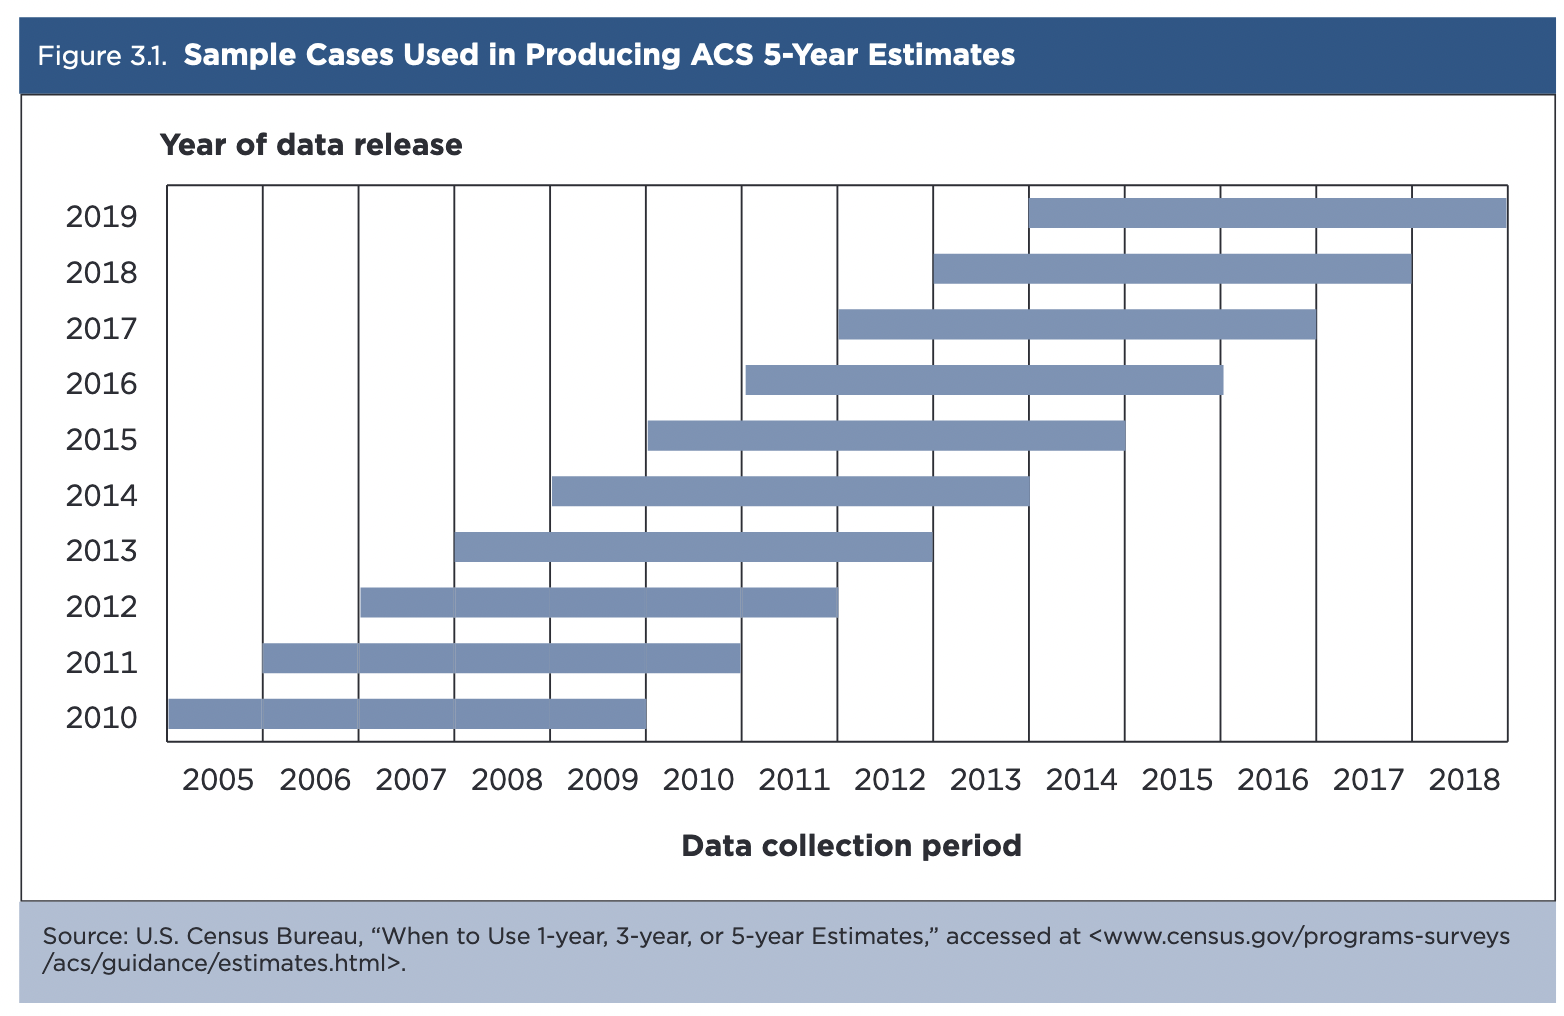

In [2]:
# for reading excel files
#!pip install openpyxl 

In [3]:
import requests
import pandas as pd

https://api.census.gov/data/2021/acs/acs1?get=NAME,B01001_001E&for=county%20subdivision:*&in=state:*&in=county:*

Extract sex by age down to subdivison

https://api.census.gov/data/2021/acs/acs1?get=NAME,B01001_001E&for=county%20subdivision:*&in=state:36

In [5]:
import numpy as np

a=np.array([["NAME","B01001_001E","state","county","county subdivision"],
["Rochester city, Monroe County, New York","210594","36","055","63000"],
["Tonawanda town, Erie County, New York","72084","36","029","75000"],
["Hempstead town, Nassau County, New York","790980","36","059","34000"],
["Albany city, Albany County, New York","98624","36","001","01000"],
["North Hempstead town, Nassau County, New York","237429","36","059","53000"],
["Oyster Bay town, Nassau County, New York","299588","36","059","56000"],
["Manhattan borough, New York County, New York","1576876","36","061","44919"],
["Schenectady city, Schenectady County, New York","66985","36","093","65508"],
["Colonie town, Albany County, New York","85448","36","001","17343"],
["Brooklyn borough, Kings County, New York","2641052","36","047","10022"],
["Bronx borough, Bronx County, New York","1424948","36","005","08510"],
["Greenburgh town, Westchester County, New York","93995","36","119","30367"],
["New Rochelle city, Westchester County, New York","81590","36","119","50617"],
["Staten Island borough, Richmond County, New York","493494","36","085","70915"],
["Clarkstown town, Rockland County, New York","86635","36","087","15968"],
["Yonkers city, Westchester County, New York","209506","36","119","84000"],
["Syracuse city, Onondaga County, New York","146124","36","067","73000"],
["Ramapo town, Rockland County, New York","150353","36","087","60510"],
["Babylon town, Suffolk County, New York","218303","36","103","04000"],
["Brookhaven town, Suffolk County, New York","485421","36","103","10000"],
["Huntington town, Suffolk County, New York","204204","36","103","37000"],
["Amherst town, Erie County, New York","129300","36","029","02000"],
["Greece town, Monroe County, New York","96228","36","055","30290"],
["Southampton town, Suffolk County, New York","69328","36","103","68473"],
["Buffalo city, Erie County, New York","276804","36","029","11000"],
["Cheektowaga town, Erie County, New York","89239","36","029","15011"],
["Queens borough, Queens County, New York","2331143","36","081","60323"],
["Islip town, Suffolk County, New York","339939","36","103","38000"],
["Smithtown town, Suffolk County, New York","116318","36","103","68000"],
["Mount Vernon city, Westchester County, New York","72584","36","119","49121"]])

In [10]:
sum(a[1:,1].astype(int))

13195116

https://api.census.gov/data/2021/acs/acs1?get=NAME,B01001_001E&for=state:36

In [ ]:
[["NAME","B01001_001E","state"],
["New York","19835913","36"]]

Is its total the same as the state

### Variables

- https://api.census.gov/data/2021/acs/acs5/subject/variables.html
- https://api.census.gov/data/2021/acs/acs5/variables.html

Note that variables ending:
- E: Estimate < We care only about this
- EA: Annotation of Estimate 
- M: Margin of errors
- MA: Annotation of Margin of Error

In [1]:
import json

In [2]:
with open('subject_variables.json') as f:
    subject_variables = json.load(f)

In [4]:
with open('detailed_variables.json') as f:
    detailed_variables = json.load(f)

In [7]:
states = pd.read_csv('state.txt', delimiter='|')

In [9]:
detailed_group = ['B01001',  # sex by age
                  'B06011',  # MEDIAN INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS) BY PLACE OF BIRTH IN THE UNITED STATES
                  'B25001',
                 ]
subject_group = ['S2504', # PHYSICAL HOUSING CHARACTERISTICS FOR OCCUPIED HOUSING UNITS
                ]

In [19]:
def cool(group, var):
    return f'NAME,group({group})' if group else f'NAME,{var}'

print(cool('12', None), cool(None, '19'))

NAME,group(12) NAME,19


In [24]:
bool(None) ^ bool('12')

True

In [12]:
keys_of_subject_tables=','.join(subject_group)
keys_of_detailed_tables=','.join(detailed_group)

In [14]:
r=requests.get(API_CALL_SUBJECT.format(keys_of_subject_tables))
r1=requests.get(API_CALL_DETAIL.format(keys_of_detailed_tables))

In [19]:
API_CALL_DETAIL.format(keys_of_detailed_tables)

'https://api.census.gov/data/2021/acs/acs5?get=NAME,group(B01001,B06011,B25001)&for=county%20subdivision:*&in=state:36'

In [31]:
alabama_house=call(API_CALL_SUBJECT, subject_group[0], '01')

https://api.census.gov/data/2021/acs/acs5/subject?get=NAME,group(S2504)&for=county%20subdivision:*&in=state:01


In [47]:
subject_variables['variables']['S0804_C04_068E']

{'label': 'Estimate!!Public transportation (excluding taxicab)!!Workers 16 years and over who did not work from home!!TIME ARRIVING AT WORK!!5:00 a.m. to 5:29 a.m.',
 'concept': 'MEANS OF TRANSPORTATION TO WORK BY SELECTED CHARACTERISTICS FOR WORKPLACE GEOGRAPHY',
 'predicateType': 'float',
 'group': 'S0804',
 'limit': 0,
 'attributes': 'S0804_C04_068EA,S0804_C04_068M,S0804_C04_068MA'}

In [32]:
alabama_house

,NAME,GEO_ID,NAME,S2504_C01_001E,S2504_C01_001EA,S2504_C01_001M,S2504_C01_001MA,S2504_C01_002E,S2504_C01_002EA,S2504_C01_002M,...,S2504_C06_037EA,S2504_C06_037M,S2504_C06_037MA,S2504_C06_038E,S2504_C06_038EA,S2504_C06_038M,S2504_C06_038MA,state,county,county subdivision
0,"Autaugaville CCD, Autauga County, Alabama",0600000US0100190171,"Autaugaville CCD, Autauga County, Alabama",1557,None,276,None,1067,None,242,...,None,15.7,None,0.0,None,15.7,None,01,001,90171
1,"Billingsley CCD, Autauga County, Alabama",0600000US0100190315,"Billingsley CCD, Autauga County, Alabama",1150,None,183,None,673,None,189,...,None,15.6,None,0.0,None,15.6,None,01,001,90315
2,"Marbury CCD, Autauga County, Alabama",0600000US0100192106,"Marbury CCD, Autauga County, Alabama",2317,None,262,None,1604,None,280,...,None,15.9,None,0.0,None,15.9,None,01,001,92106
3,"Prattville CCD, Autauga County, Alabama",0600000US0100192628,"Prattville CCD, Autauga County, Alabama",16832,None,401,None,12984,None,601,...,None,0.7,None,0.3,None,0.5,None,01,001,92628
4,"Bay Minette CCD, Baldwin County, Alabama",0600000US0100390207,"Bay Minette CCD, Baldwin County, Alabama",8944,None,625,None,6830,None,592,...,None,2.1,None,0.0,None,2.1,None,01,003,90207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,"Pine Hill CCD, Wilcox County, Alabama",0600000US0113192583,"Pine Hill CCD, Wilcox County, Alabama",922,None,135,None,480,None,116,...,None,19.7,None,0.0,None,19.7,None,01,131,92583
386,"Addison CCD, Winston County, Alabama",0600000US0113390027,"Addison CCD, Winston County, Alabama",3376,None,335,None,2340,None,272,...,None,8.2,None,0.0,None,8.0,None,01,133,90027
387,"Double Springs CCD, Winston County, Alabama",0600000US0113390909,"Double Springs CCD, Winston County, Alabama",1920,None,216,None,1132,None,192,...,None,6.7,None,0.0,None,9.4,None,01,133,90909
388,"Haleyville CCD, Winston County, Alabama",0600000US0113391494,"Haleyville CCD, Winston County, Alabama",3018,None,272,None,1941,None,212,...,None,4.4,None,2.0,None,3.0,None,01,133,91494


In [37]:
alabama_house.columns[4].endswith('EA')

True

In [41]:
def drop_margin_error_columns(original_df):
    df = original_df.copy()
    for column in df.columns:
        if column.endswith('EA') or column.endswith('M') or column.endswith('MA'):
            df = df.drop(column, axis=1)
    return df

In [63]:
def rename_column(original_df, name_dict):
    df = original_df.copy()
    for column in df.columns:
        if column in name_dict['variables'].keys():
            df = df.rename({column: name_dict['variables'][column]['label']}, axis=1)
    return df

In [55]:
subject_variables['variables']['S2504_C01_001E']

{'label': 'Estimate!!Occupied housing units!!Occupied housing units',
 'concept': 'PHYSICAL HOUSING CHARACTERISTICS FOR OCCUPIED HOUSING UNITS',
 'predicateType': 'int',
 'group': 'S2504',
 'limit': 0,
 'attributes': 'S2504_C01_001EA,S2504_C01_001M,S2504_C01_001MA'}

In [51]:
alabama_house = drop_margin_error_columns(alabama_house)

In [64]:
rename_column(alabama_house, subject_variables)

,NAME,Geography,NAME,Estimate!!Occupied housing units!!Occupied housing units,"Estimate!!Occupied housing units!!Occupied housing units!!UNITS IN STRUCTURE!!1, detached","Estimate!!Occupied housing units!!Occupied housing units!!UNITS IN STRUCTURE!!1, attached",Estimate!!Occupied housing units!!Occupied housing units!!UNITS IN STRUCTURE!!2 apartments,Estimate!!Occupied housing units!!Occupied housing units!!UNITS IN STRUCTURE!!3 or 4 apartments,Estimate!!Occupied housing units!!Occupied housing units!!UNITS IN STRUCTURE!!5 to 9 apartments,Estimate!!Occupied housing units!!Occupied housing units!!UNITS IN STRUCTURE!!10 or more apartments,...,Estimate!!Percent renter-occupied housing units!!Occupied housing units!!HOUSE HEATING FUEL!!Utility gas,"Estimate!!Percent renter-occupied housing units!!Occupied housing units!!HOUSE HEATING FUEL!!Bottled, tank, or LP gas",Estimate!!Percent renter-occupied housing units!!Occupied housing units!!HOUSE HEATING FUEL!!Electricity,"Estimate!!Percent renter-occupied housing units!!Occupied housing units!!HOUSE HEATING FUEL!!Fuel oil, kerosene, etc.",Estimate!!Percent renter-occupied housing units!!Occupied housing units!!HOUSE HEATING FUEL!!Coal or coke,Estimate!!Percent renter-occupied housing units!!Occupied housing units!!HOUSE HEATING FUEL!!All other fuels,Estimate!!Percent renter-occupied housing units!!Occupied housing units!!HOUSE HEATING FUEL!!No fuel used,state,county,county subdivision
0,"Autaugaville CCD, Autauga County, Alabama",0600000US0100190171,"Autaugaville CCD, Autauga County, Alabama",1557,1067,2,0,6,32,33,...,5.5,39.0,50.9,4.6,0.0,0.0,0.0,01,001,90171
1,"Billingsley CCD, Autauga County, Alabama",0600000US0100190315,"Billingsley CCD, Autauga County, Alabama",1150,673,0,0,0,0,0,...,4.1,31.4,64.5,0.0,0.0,0.0,0.0,01,001,90315
2,"Marbury CCD, Autauga County, Alabama",0600000US0100192106,"Marbury CCD, Autauga County, Alabama",2317,1604,0,0,0,26,0,...,8.8,39.8,51.4,0.0,0.0,0.0,0.0,01,001,92106
3,"Prattville CCD, Autauga County, Alabama",0600000US0100192628,"Prattville CCD, Autauga County, Alabama",16832,12984,297,53,377,495,828,...,26.5,2.8,70.4,0.0,0.0,0.0,0.3,01,001,92628
4,"Bay Minette CCD, Baldwin County, Alabama",0600000US0100390207,"Bay Minette CCD, Baldwin County, Alabama",8944,6830,44,126,57,144,73,...,6.6,1.5,91.8,0.0,0.0,0.0,0.0,01,003,90207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,"Pine Hill CCD, Wilcox County, Alabama",0600000US0113192583,"Pine Hill CCD, Wilcox County, Alabama",922,480,0,0,24,30,0,...,4.1,4.1,91.8,0.0,0.0,0.0,0.0,01,131,92583
386,"Addison CCD, Winston County, Alabama",0600000US0113390027,"Addison CCD, Winston County, Alabama",3376,2340,3,48,13,0,23,...,0.0,11.9,79.6,0.0,0.0,8.4,0.0,01,133,90027
387,"Double Springs CCD, Winston County, Alabama",0600000US0113390909,"Double Springs CCD, Winston County, Alabama",1920,1132,12,79,0,25,8,...,32.4,13.4,50.0,0.0,0.0,4.2,0.0,01,133,90909
388,"Haleyville CCD, Winston County, Alabama",0600000US0113391494,"Haleyville CCD, Winston County, Alabama",3018,1941,0,97,134,83,24,...,38.6,10.5,47.7,1.2,0.0,0.0,2.0,01,133,91494


In [26]:
subject_df.columns

Index(['NAME', 'S1901_C01_001E', 'S2504_C01_001E', 'state', 'county',
       'county subdivision'],
      dtype='object')

In [25]:
assert(len(subject_df)==len(detailed_df))

In [28]:
merged = pd.merge(subject_df, detailed_df, how='inner', 
                  on=['NAME','state', 'county', 'county subdivision'])

In [29]:
assert(len(merged)==len(detailed_df))

In [31]:
merged=merged.rename(vars_name['subject'], axis=1)

In [32]:
merged=merged.rename(vars_name['detailed'], axis=1)

In [33]:
merged

,NAME,INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS,Estimate!!Occupied housing units!!Occupied housing units,state,county,county subdivision,SEX BY AGE
0,"Rochester city, Monroe County, New York",93263,93263,36,055,63000,210594
1,"Tonawanda town, Erie County, New York",31380,31380,36,029,75000,72084
2,"Hempstead town, Nassau County, New York",252410,252410,36,059,34000,790980
3,"Albany city, Albany County, New York",44279,44279,36,001,01000,98624
4,"North Hempstead town, Nassau County, New York",81373,81373,36,059,53000,237429
5,"Oyster Bay town, Nassau County, New York",100178,100178,36,059,56000,299588
6,"Manhattan borough, New York County, New York",737575,737575,36,061,44919,1576876
7,"Schenectady city, Schenectady County, New York",28965,28965,36,093,65508,66985
8,"Colonie town, Albany County, New York",34753,34753,36,001,17343,85448
9,"Brooklyn borough, Kings County, New York",1001868,1001868,36,047,10022,2641052


## List of states

Taken from https://www.census.gov/library/reference/code-lists/ansi/ansi-codes-for-states.html

In [45]:
import urllib.parse

CENSUS_URL_SUBJECT="https://api.census.gov/data/2021/acs/acs5/subject"
CENSUS_URL_DETAIL="https://api.census.gov/data/2021/acs/acs5"


def call(formatted_link) -> pd.DataFrame:
    json = requests.get(formatted_link).json()
    return pd.DataFrame(columns=json[0], data=json[1:])

def build_link(base_link, state: str, var: str=None, group: int=None, ):
    """
    state: str
        Due to leading zero, cannot be int
    """
    if not(bool(var) ^ bool(group)):
        raise ValueError("must be var xor group")
        
    params = {'get': f'NAME,group({group})' if group else f'NAME,{var}',
              'for': 'county subdivision:*',
              'in': f'state:{state}'
             }
    return urllib.parse.unquote(base_link+'?'+urllib.parse.urlencode(params))

assert build_link(CENSUS_URL_SUBJECT,36,group='S2504')=='https://api.census.gov/data/2021/acs/acs5/subject?get=NAME,group(S2504)&for=county+subdivision:*&in=state:36'

## Urban, suburban and rural scale

Census has a term Urbanized area (UA) and they maintain a list for that here https://www.census.gov/programs-surveys/geography/guidance/geo-areas/urban-rural.html


Sometimes it is not based on population to be shortlisted in UA. However, outside of UAs, an urban place is any incorporated place or census designated place (CDP) with at least 2,500 inhabitants (Copy from https://www2.census.gov/geo/pdfs/reference/GARM/Ch12GARM.pdf)


I am using these two rules to filter out urban area. Census says what is not urban is rural, except for extended city. It is easy to default everything to rural, but seems complicated to extract extended city. I would await for your input on this last point

In [4]:
ua_df = pd.read_excel("2020_Census_ua_list_all.xlsx")

With this urban problem, we will use variable `B01003_001E: TOTAL POPULATION` from `https://api.census.gov/data/2021/acs/acs5/variables.html`

In [5]:
states=pd.read_csv("state.txt", sep='|')

In [6]:
states

,STATE,STUSAB,STATE_NAME,STATENS
0,1,AL,Alabama,1779775
1,2,AK,Alaska,1785533
2,4,AZ,Arizona,1779777
3,5,AR,Arkansas,68085
4,6,CA,California,1779778
5,8,CO,Colorado,1779779
6,9,CT,Connecticut,1779780
7,10,DE,Delaware,1779781
8,11,DC,District of Columbia,1702382
9,12,FL,Florida,294478


In [7]:
list_states=states['STATE'].values


In [8]:
ua_df

,UACE,NAME,POP,HOUSING,AREALAND,AREALANDSQMI,AREAWATER,AREAWATERSQMI,POPDEN
0,37,"Abbeville, LA",18078,8521,28823510,11.128820,340389,0.131425,1624.430996
1,64,"Abbeville, SC",4940,2453,12815034,4.947912,6144,0.002372,998.400841
2,145,"Aberdeen, SD",27982,13246,35989073,13.895459,183150,0.070715,2013.751347
3,172,"Aberdeen, WA",26603,11561,28416189,10.971552,1802207,0.695836,2424.725243
4,253,"Abilene, KS",6605,3216,9426821,3.639716,1877,0.000725,1814.701981
...,...,...,...,...,...,...,...,...,...
2641,98074,"Zanesville, OH",42301,20014,73304717,28.303111,745596,0.287876,1494.570703
2642,98101,"Zapata--Medina, TX",10942,4642,12847239,4.960347,0,0.000000,2205.894099
2643,98129,"Zebulon, NC",8158,3149,15830724,6.112277,33264,0.012843,1334.690827
2644,98182,"Zephyrhills, FL",55133,32009,88329081,34.104050,385518,0.148849,1616.611503


In [11]:
call(build_link(CENSUS_URL_DETAIL, format(1,"02"), var='B01003_001E'))

,NAME,B01003_001E,state,county,county subdivision
0,"Autaugaville CCD, Autauga County, Alabama",3850,01,001,90171
1,"Billingsley CCD, Autauga County, Alabama",2959,01,001,90315
2,"Marbury CCD, Autauga County, Alabama",6540,01,001,92106
3,"Prattville CCD, Autauga County, Alabama",44890,01,001,92628
4,"Bay Minette CCD, Baldwin County, Alabama",26591,01,003,90207
...,...,...,...,...,...
385,"Pine Hill CCD, Wilcox County, Alabama",2715,01,131,92583
386,"Addison CCD, Winston County, Alabama",8110,01,133,90027
387,"Double Springs CCD, Winston County, Alabama",5383,01,133,90909
388,"Haleyville CCD, Winston County, Alabama",7844,01,133,91494


In [29]:
states.tail(9)

,STATE,STUSAB,STATE_NAME,STATENS
48,54,WV,West Virginia,1779805
49,55,WI,Wisconsin,1779806
50,56,WY,Wyoming,1779807
51,60,AS,American Samoa,1802701
52,66,GU,Guam,1802705
53,69,MP,Northern Mariana Islands,1779809
54,72,PR,Puerto Rico,1779808
55,74,UM,U.S. Minor Outlying Islands,1878752
56,78,VI,U.S. Virgin Islands,1802710


In [34]:
states_without_data = {60, 66, 69, 74, 78}
# respectively American Samoa, Guam, Northern Mariana Islands, 
# U.S. Minor Outlying Islands,U.S. Virgin Islands

In [18]:
state

60

In [42]:
build_link(CENSUS_URL_DETAIL, format(state,"02"), var='B01003_001E')

'https://api.census.gov/data/2021/acs/acs1?get=NAME,B01003_001E&for=county+subdivision:*&in=state:01'

In [41]:
state

1

In [57]:
dfs = []
for state in set(states['STATE'].values) - states_without_data:
    dfs.append(call(build_link(CENSUS_URL_DETAIL, format(state,"02"), var='B01003_001E')))
all_states_df = pd.concat(dfs)

In [58]:
all_states_df

,NAME,B01003_001E,state,county,county subdivision
0,"Autaugaville CCD, Autauga County, Alabama",3850,01,001,90171
1,"Billingsley CCD, Autauga County, Alabama",2959,01,001,90315
2,"Marbury CCD, Autauga County, Alabama",6540,01,001,92106
3,"Prattville CCD, Autauga County, Alabama",44890,01,001,92628
4,"Bay Minette CCD, Baldwin County, Alabama",26591,01,003,90207
...,...,...,...,...,...
934,"Sierra Alta barrio, Yauco Municipio, Puerto Rico",1164,72,153,80166
935,"Susúa Alta barrio, Yauco Municipio, Puerto Rico",3233,72,153,81069
936,"Susúa Baja barrio, Yauco Municipio, Puerto Rico",11052,72,153,81155
937,"Vegas barrio, Yauco Municipio, Puerto Rico",0,72,153,85541


In [ ]:
# https://api.census.gov/data/2021/acs/acs5/examples.html 
# shows how we can drill down to tract, block

In [59]:
all_states_df = all_states_df.rename({'B01003_001E': 'Total population'}, axis=1)

In [60]:
all_states_df.to_csv('all_states_population.csv', index=False)

In [1]:
import pandas as pd
all_states_df=pd.read_csv('all_states_population.csv')

In [2]:
tmp = all_states_df['Total population'].values.copy()

In [3]:
tmp = tmp.astype('int')

In [4]:
tmp.sort()

In [5]:
tmp[-1]

3448054

In [9]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

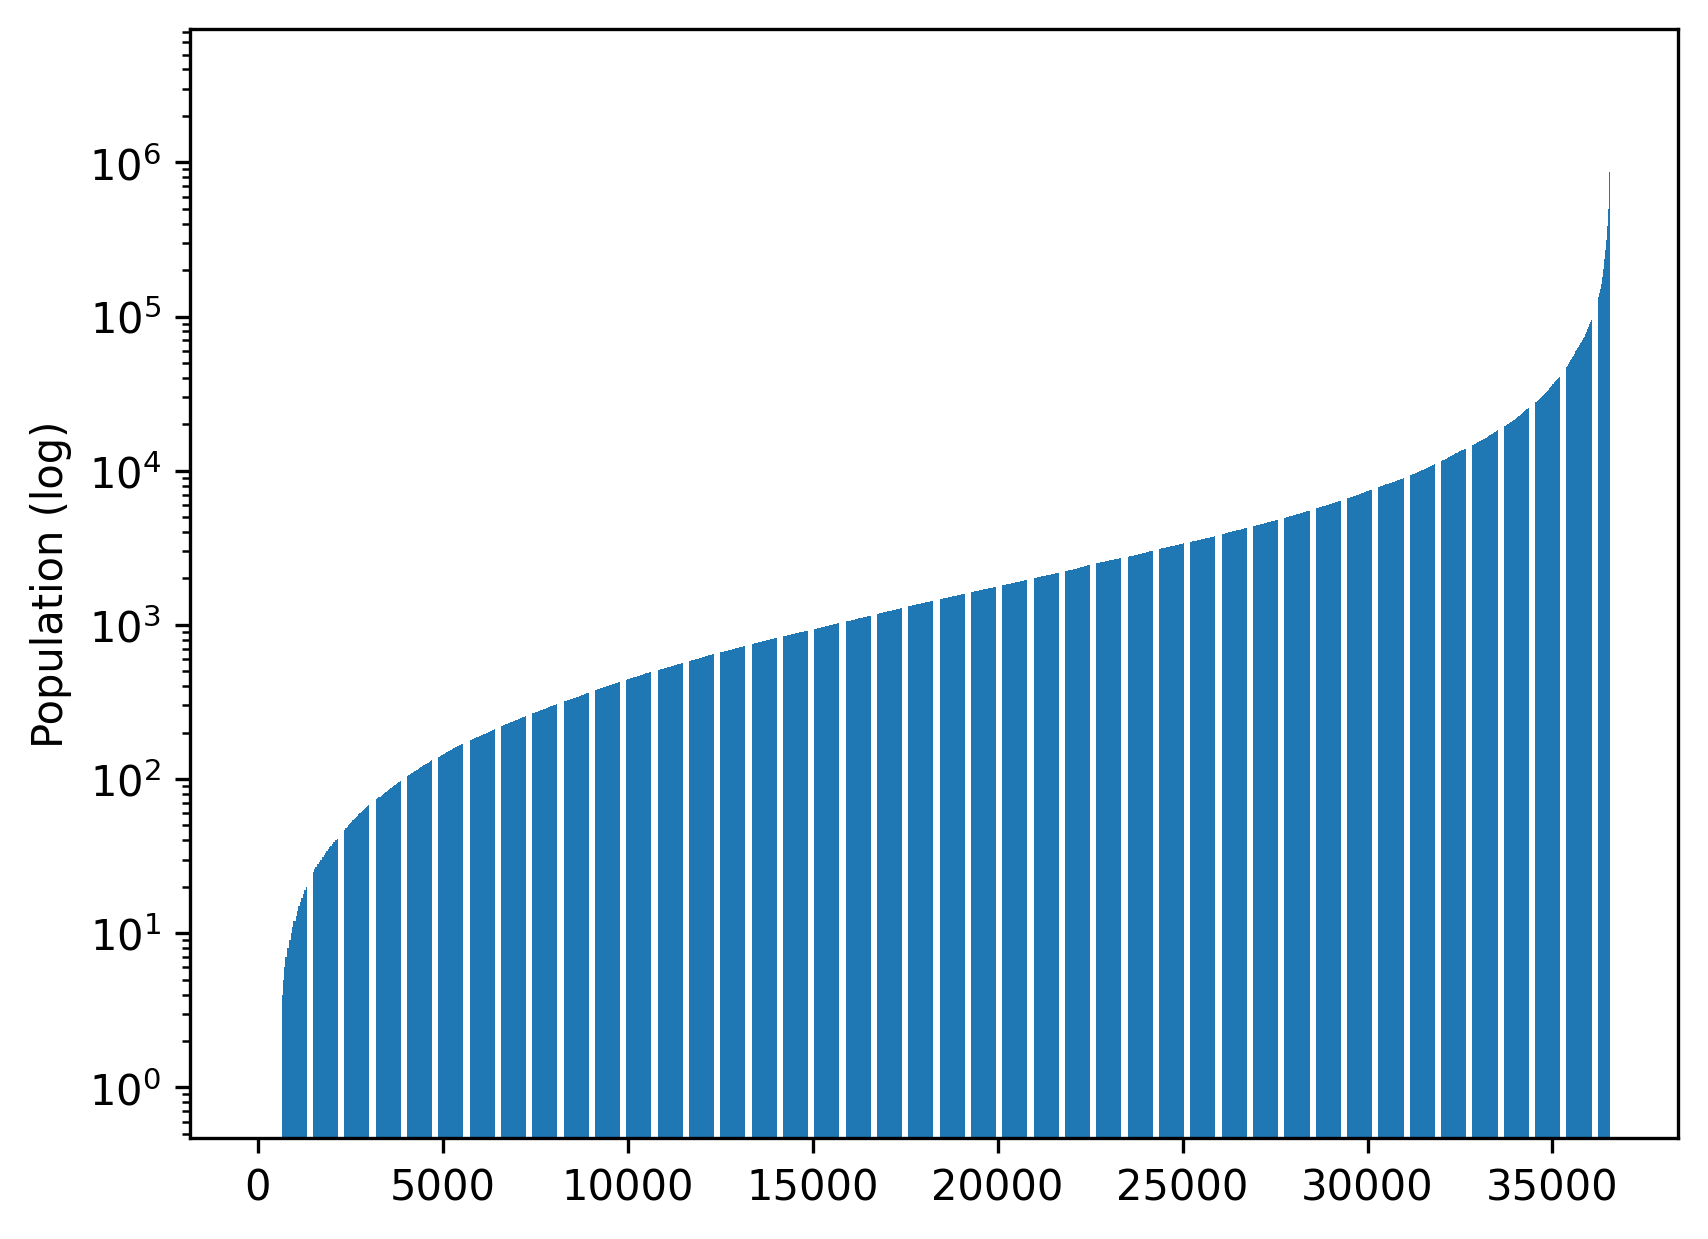

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_yscale('log')
ax.set_ylabel('Population (log)')

ax.bar(range(len(tmp)), tmp)
plt.show()